In [1]:
import numpy as np
from skimage import io, data, transform, filters, util, color, util, exposure
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
def show(img_list, caption_list, Axis=False):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        ax[i].imshow(img_list[i], cmap='gray')
        ax[i].set_title(caption_list[i])
        if not Axis:
            ax[i].set_axis_off()

In [3]:
def mapping(img):
    nimg = util.img_as_float(img)
    mmin = np.min(nimg)
    nimg = nimg - mmin
    mmax = np.max(nimg)
    return nimg/mmax

# Questão 1

<p> Corrija esse problema por meio da função <i>contrast-stretching()</i> </p>


<center>
<img src="https://drive.google.com/uc?id=1Tils6Uo-h2fh3JoTcsaMexoKR1AaMXqb" alt="Drawing" style="width: 250px;"/>
</center>


<p>
Função <i>contrast-stretching</i> $$s = T(r) = \frac{1}{1 + (m/r)^E}$$ onde $r$ denota a intensidade da imagem, $m$ é um valor dentro do intervalo [0,1] e $E$ um valor positivo.

<center>
<img src="https://drive.google.com/uc?id=1hPgC1WDTmuU8A2E6AeEXPmanf_vW81_a" alt="Drawing" width="230" />
</center>


</p>

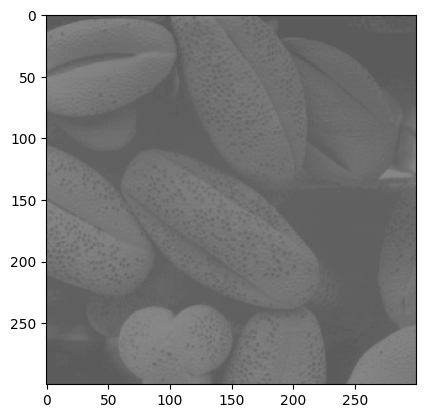

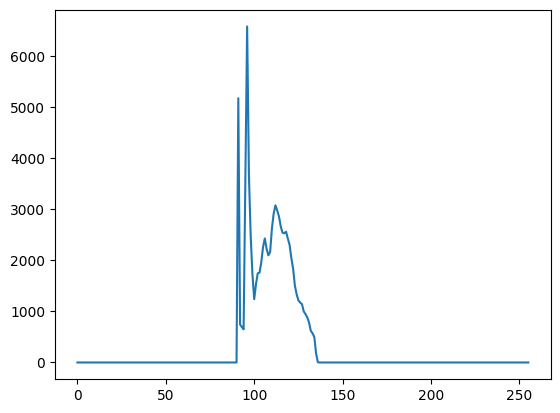

In [4]:
img2 = io.imread("https://drive.google.com/uc?id=1Tils6Uo-h2fh3JoTcsaMexoKR1AaMXqb")
plt.imshow(img2, cmap='gray', vmin =0, vmax=255)

hist = ndimage.histogram(img2, 0, 255, 256)
plt.figure()
plt.plot(hist)

#1.1. Implementar o código para graficar a função *contrast streaching*

<center>
<img src="https://drive.google.com/uc?id=1hPgC1WDTmuU8A2E6AeEXPmanf_vW81_a" alt="Drawing" width="230" />
</center>

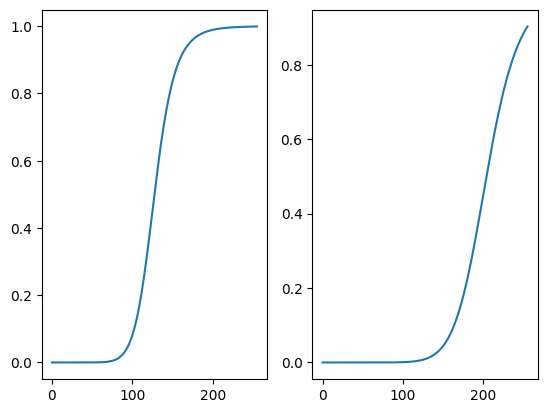

In [6]:
np.seterr(divide='ignore', invalid='ignore')

def constrast_streching_function(m, E):
    r = np.linspace(0, 1, 256)
    f = 1 / ((m / r)**E + 1)

    return f

f1 = constrast_streching_function(m = 0.5, E = 10)
f2 = constrast_streching_function(m = 0.8, E = 10)

plt.subplot(121)
plt.plot(f1)
plt.subplot(122)
plt.plot(f2)

## 1.2 Implementar código que permita aplicar a função *constrast streaching* em imagens

In [9]:
def constrast_streaching(img, m=0.5, E=2):
    r = util.img_as_float(img)
    nimg = 1 / ((m / r)**E + 1)

    return nimg

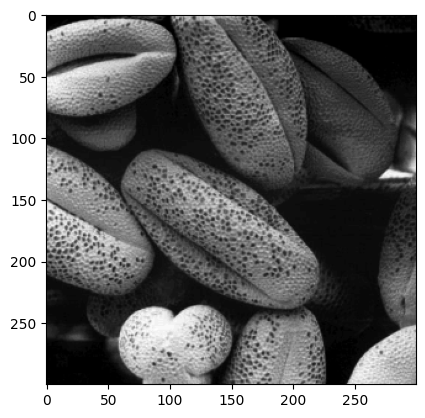

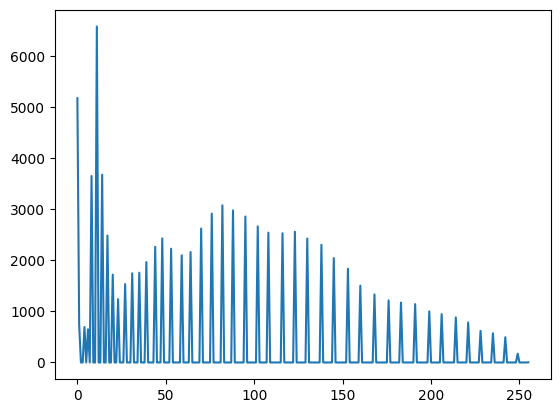

In [10]:
nimg = mapping(constrast_streaching(img2, m=0.5, E=9))
plt.imshow(nimg, cmap='gray', vmin=0, vmax=1)

h2 = ndimage.histogram(nimg, min=0, max=1, bins=256)
plt.figure()
plt.plot(h2)

# Questão 2
<p align="justify">
A técnica de equalização de histograma permite alterar o histograma de uma imagem, porém, sempre de acordo com uma função de transformação padrão. Apesar de ser uma técnica muito atrativa, a equalização de histograma não é uma panaceia. Em muitas oportunidades o efeito produzido pela equalização não é o desejado, como o observado na figura seguinte. Na Figura da esquerda temos uma imagem muito escura de uma lua de Marte, a da direita é o resultado depois de aplicar a equalização de histograma.
</p>

<table><tr>
<td> 
<figure><img src="https://drive.google.com/uc?id=1W0PYWVB1wq4HgH-nRheuJmFlkGdlFVRr" alt="Drawing" width="300" class="center"/> 
<figcaption>Imagem original</figcaption>
</figure>
</td>
<td> 
<figure>
<img src="https://drive.google.com/uc?id=1Ka9j-lVMYZjaG6BuGVTHl26N3S6pVyVG" alt="Drawing" width="300" class="center"/> 
<figcaption>Imagem Equalizada</figcaption>
</figure>
</td>
</tr>
</table>



<p align="justify">Como pode se observar, o resultado não teve o efeito desejado. Há situações em que é desejável definir formas específicas para o histograma da imagem. 
A técnica conhecida como <i>especificação de histograma (histogram matching)</i> é a transformação de uma imagem para que seu histograma corresponda a um histograma especificado. O objetivo é obter uma imagem de entrada e gerar uma imagem de saída baseada na forma de um histograma específico (ou de referência).
A imagem da direita mostra o resultado de aplicar a técnica de especificação de histograma. O histograma da imagem resultante foi aproximado ao histograma mostrado na imagem da esquerda.</p>

<table><tr>
<td> 
<figure><img src="https://drive.google.com/uc?id=1aw1fqZmuiSG3oSxVXVoWFCOeOY_haRWn" alt="Drawing" width="500" class="center"/> 
<figcaption>Histograma utilizado</figcaption>
</figure>
</td>
<td> 
<figure>
<img src="https://drive.google.com/uc?id=1F9xVWRZMthC90DOSue9TM7EhnrZ3W8m2" alt="Drawing" width="300" class="center"/> 
<figcaption>Imagem Corrigida</figcaption>
</figure>
</td>
</tr>
</table>

<p align="justify">
Vejamos como realizar essa operação. Seja $F_1$ a função de distribuição cumulativa (CDF) da imagem de entrada e $F_2$ a CDF do histograma alvo. Agora é necessário calcular o mapeamento que transforme uma intensidade da imagem de entrada de forma tal que seja similar à distribuição de intensidade do histograma alvo. Para cada intensidade $G_1$ da imagem, devemos encontrar a intensidade $G_2$ tal que: $F1(G1) = F2(G2)$.</p>

<p align="justify">
Existirá casos em que não será possível encontrar exatamente esse igualdade, nesse caso é necessário encontrar a menor diferença absoluta entre $F_1(G1)$ e $F_2(G_2)$. Em outras palavras, para mapear $M$, para cada entrada de $G_1$, encontrar a intensidade $G_2$ tal que:
</p>

$$M(G_1) = arg min_{G_2 \in [0, 255]} |F_1(G_1) - F_2(G_2)| \textrm{,    } \forall G_1 \in [0,255]$$

<p align="justify">
A operação consiste em encontrar para cada valor de $F1(G_1)$ o valor mais próximo em $F_2(G_2)$, ou seja, para cada intensidade em $G_1$, aplicar a função $F_1(G_1)$ e calcular a diferença com todos os $F_2(G_2)$ e encontrar a intensidade que gere a menor diferença e salvar essa intensidade de $G_2$ em $M$.
</p>

<p>
<ol>
  <li>Calcular o histograma da imagem a ser processada</li>
  <li>Normalize o histograma calculando a função de densidade de probabilidade (divida o histograma pela soma de todos os elementos)</li>
  <li>Calcule a função de distribuiçao cumulativa do histograma normalizado</li>
  <li>Execute os três passos anteriores usando a imagem alvo</li>
  <li>Para cada intensidade em $F_1$</li>
  <ol>
    <li>Calcular a diferença com todos os elementos da função de distribuiçao cumulativa alvo</li>
    <li>Encontrar a posiçao com menor diferença (a posição é o valor da intensidade)</li>
    <li>Adicionar essa intensidade à função de transformação</li>
  </ol>
  <li>Aplicar a função de transformação na imagem</li> 
</ol>
</p>

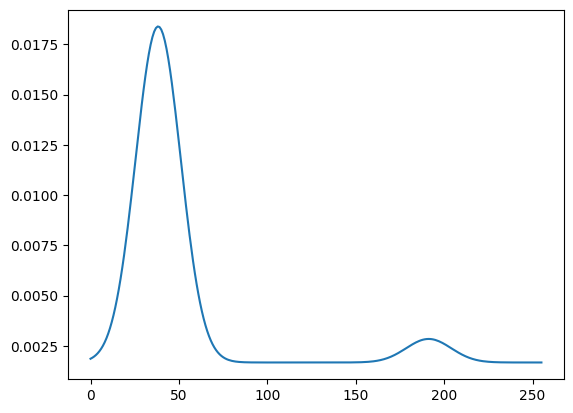

In [14]:
h = np.loadtxt('https://drive.google.com/uc?id=1n1uYESkn2TsD-8E0mH6K-4D7o1I5TwuX')
plt.plot(h)

In [11]:
def my_histogram_matching(img, hist):
  M = np.zeros(256, dtype=np.uint8)

  hist_img = ndimage.histogram(img, 0, 255, 256)
  soma_img = np.sum(hist_img)
  norma_img = hist_img/soma_img
  cum_img = np.cumsum(norma_img)
  cum_hist = np.cumsum(hist)

  for g in range(256):
    diff = np.abs(cum_img[g] - cum_hist)
    M[g] = np.argmin(diff)

  nimg = M[img]
  return nimg



[[200 208 209 204]
 [203 205 205 204]
 [202 202 202 202]
 [201 202 201 195]]


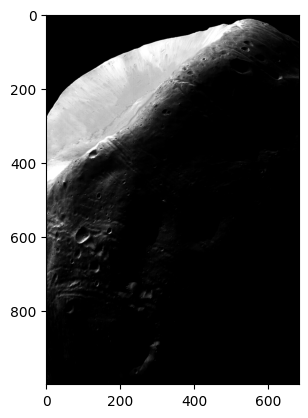

In [12]:
img_lua = io.imread('https://drive.google.com/uc?id=1W0PYWVB1wq4HgH-nRheuJmFlkGdlFVRr')
plt.imshow(img_lua, cmap='gray')
p = 200
print(img_lua[p:p+4,p:p+4])

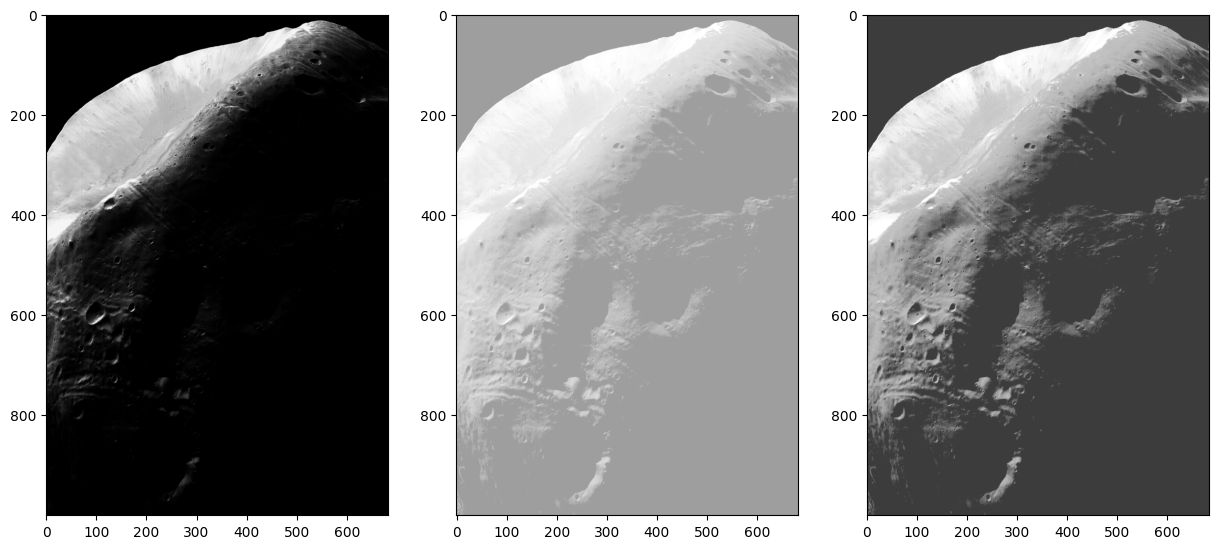

In [15]:
nimg = my_histogram_matching(img_lua, h)
img_eq = exposure.equalize_hist( img_lua, nbins = 256 )*255

f, ax = plt.subplots(1,3, figsize=(15,10))
ax[0].imshow(img_lua, cmap='gray', vmin=0, vmax=266)
ax[1].imshow(img_eq, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(nimg, cmap='gray', vmin=0, vmax=255)


# Questão 3
<p align="justify"> 
Modifique o código <i>my_histogram_matching()</i> para que receba uma segunda imagem como parâmetro. Essa segunda imagem será usada para ajustar seu histograma cumulativo e corresponda ao da outra.
</p>

In [16]:
def my_histogram_matching2(img, img_target):
  M = np.zeros(256, dtype=np.uint8)
  
  hist_img = ndimage.histogram(img, 0, 255, 256)
  soma_img = np.sum(hist_img)
  norma_img = hist_img/soma_img
  cum_img = np.cumsum(norma_img)

  hist_img2 = ndimage.histogram(img_target, 0, 255, 256)
  soma_img2 = np.sum(hist_img2)
  norma_img2 = hist_img2/soma_img2
  cum_hist = np.cumsum(norma_img2)

  for g in range(256):
      diff = np.abs(cum_img[g] - cum_hist)
      M[g] = np.argmin(diff)

  nimg = M[img]

  return nimg

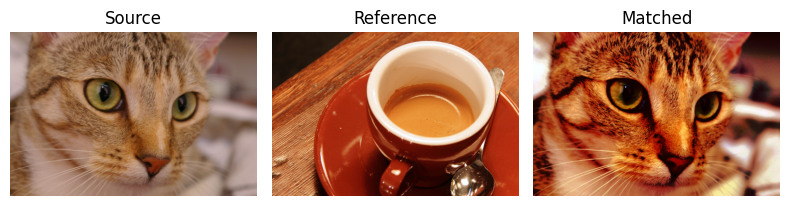

In [17]:
reference = data.coffee()
image = data.chelsea()

#matched = exposure.match_histograms(image, reference, channel_axis=2)
R = my_histogram_matching2(image[:,:,0], reference[:,:,0])
G = my_histogram_matching2(image[:,:,1], reference[:,:,1])
B = my_histogram_matching2(image[:,:,2], reference[:,:,2])
matched = np.dstack((R,G,B)).astype(np.uint8)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()